<a href="https://colab.research.google.com/github/ledyquesada/Ejercicios/blob/main/ISemana6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRANSFORMACIONES AVANZADAS

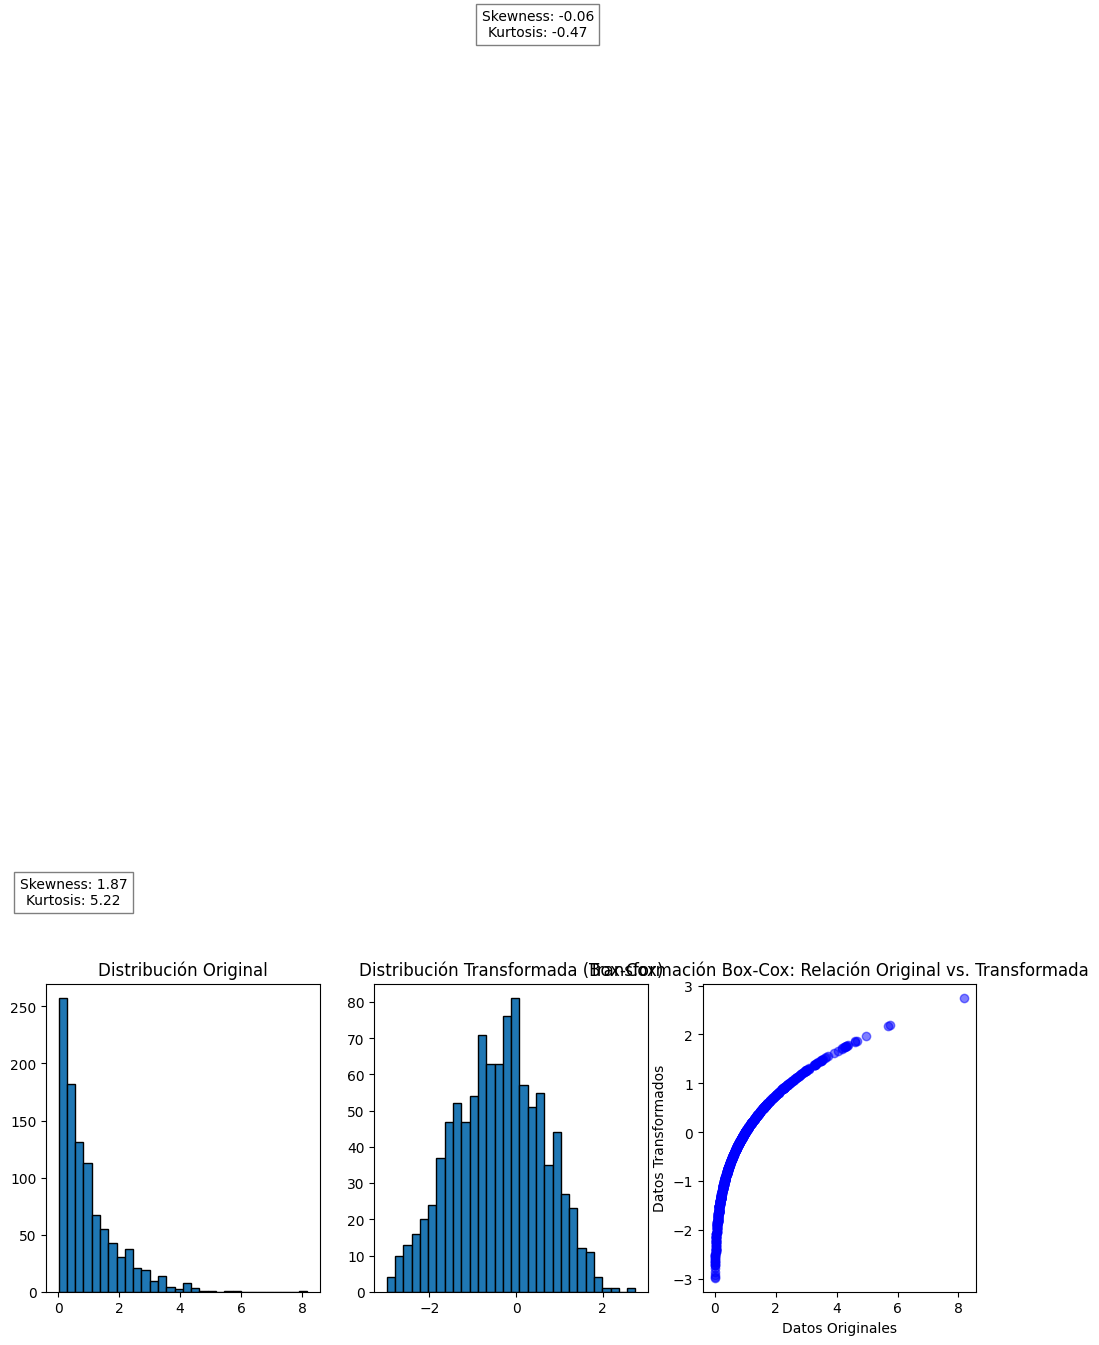

<ipython-input-2-0c9f91c0de68>:44: RuntimeWarning: invalid value encountered in sqrt
  y_sqrt = np.sqrt(y_nonlinear)
<ipython-input-2-0c9f91c0de68>:45: RuntimeWarning: invalid value encountered in log
  y_log = np.log(y_nonlinear)


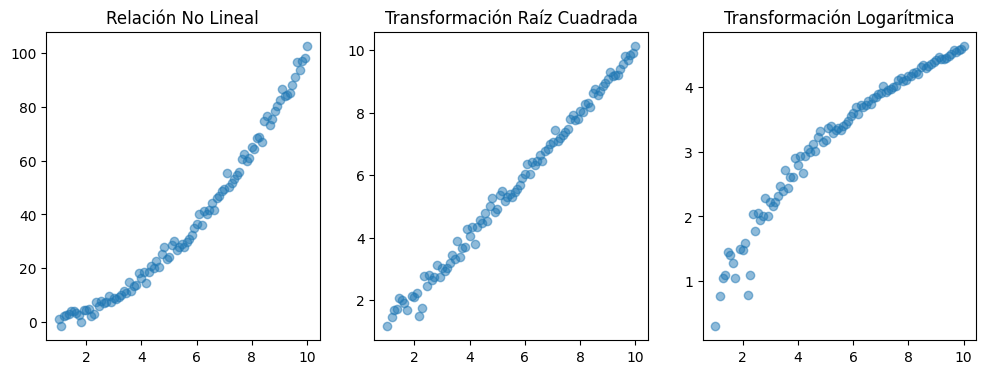

In [2]:
#transformacion Box-Cox
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import skew, kurtosis

# Generar datos asimétricos
np.random.seed(42)
data = np.random.exponential(size=1000)

# Aplicar transformación Box-Cox
transformed_data, lambda_value = boxcox(data)

# Visualización antes y después de la transformación
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data, bins=30, edgecolor='black')
plt.title('Distribución Original')
plt.text(0.5, 350, f'Skewness: {skew(data):.2f}\nKurtosis: {kurtosis(data):.2f}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.subplot(1, 3, 2)
plt.hist(transformed_data, bins=30, edgecolor='black')
plt.title('Distribución Transformada (Box-Cox)')
plt.text(0.5, 350, f'Skewness: {skew(transformed_data):.2f}\nKurtosis: {kurtosis(transformed_data):.2f}', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.subplot(1, 3, 3)
plt.plot(data, transformed_data, 'bo', alpha=0.5)
plt.title('Transformación Box-Cox: Relación Original vs. Transformada')
plt.xlabel('Datos Originales')
plt.ylabel('Datos Transformados')
plt.show()

#No lineales

import numpy as np
import matplotlib.pyplot as plt

# Generar datos con relación no lineal
x = np.linspace(1, 10, 100)
y_nonlinear = x**2 + np.random.normal(0, 2, 100)

# Aplicar transformaciones no lineales
y_sqrt = np.sqrt(y_nonlinear)
y_log = np.log(y_nonlinear)

# Visualización de las transformaciones
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(x, y_nonlinear, alpha=0.5)
plt.title('Relación No Lineal')

plt.subplot(1, 3, 2)
plt.scatter(x, y_sqrt, alpha=0.5)
plt.title('Transformación Raíz Cuadrada')

plt.subplot(1, 3, 3)
plt.scatter(x, y_log, alpha=0.5)
plt.title('Transformación Logarítmica')

plt.show()



**EJEMPLO: Calcular y visualizar el % acumualdo de varianza**

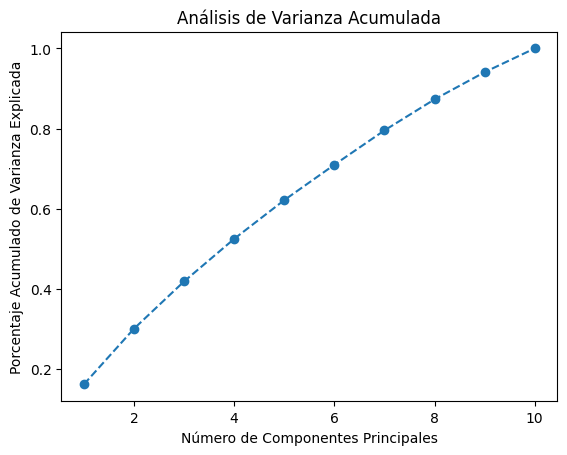

EJEMPLO EXPLICATIVO 
Primeras filas del DataFrame:
   Variable_1  Variable_2  Variable_3  Variable_4  Variable_5  Variable_6  \
0    0.374540    0.950714    0.731994    0.598658    0.156019    0.155995   
1    0.611853    0.139494    0.292145    0.366362    0.456070    0.785176   
2    0.122038    0.495177    0.034389    0.909320    0.258780    0.662522   
3    0.388677    0.271349    0.828738    0.356753    0.280935    0.542696   
4    0.863103    0.623298    0.330898    0.063558    0.310982    0.325183   

   Variable_7  Variable_8  Variable_9  Variable_10  Variable_11  Variable_12  \
0    0.058084    0.866176    0.601115     0.708073     0.020584     0.969910   
1    0.199674    0.514234    0.592415     0.046450     0.607545     0.170524   
2    0.311711    0.520068    0.546710     0.184854     0.969585     0.775133   
3    0.140924    0.802197    0.074551     0.986887     0.772245     0.198716   
4    0.729606    0.637557    0.887213     0.472215     0.119594     0.713245   

   Va

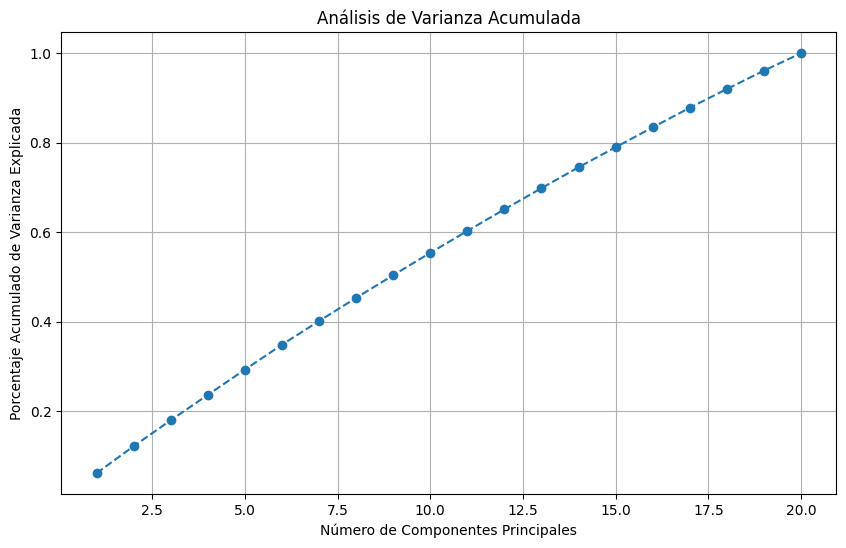


Número de componentes para explicar al menos el 95% de la varianza: 19

Primeras filas del conjunto de datos transformado:
   Componente_1  Componente_2  Componente_3  Componente_4  Componente_5  \
0     -0.177021      0.196946      0.380536      0.600370      0.004683   
1     -0.098799     -0.051236     -0.113252     -0.249617     -0.003372   
2      0.495869      0.307295      0.334187      0.191079      0.386715   
3     -0.545123      0.048805     -0.100849     -0.419703     -0.329299   
4      0.052469      0.693380      0.156894      0.103554      0.084592   

   Componente_6  Componente_7  Componente_8  Componente_9  Componente_10  \
0      0.436867      0.121947      0.000379      0.179966      -0.183514   
1     -0.558524      0.184328     -0.089373      0.127126       0.073608   
2      0.196728     -0.168530     -0.039448     -0.067065       0.009247   
3     -0.149264      0.772666     -0.165841      0.132679       0.180556   
4      0.393504      0.180040     -0.270969  

In [3]:
#Ejemplo 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crear un conjunto de datos simulado con 10 variables
np.random.seed(42)
data = np.random.rand(100, 10)

# Convertir a un DataFrame de Pandas para mayor comodidad
df = pd.DataFrame(data, columns=[f'Variable_{i}' for i in range(1, 11)])

# Análisis de Componentes Principales (PCA)
pca = PCA()
pca.fit(df)

# Varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Porcentaje acumulado de varianza explicada
porcentaje_acumulado_varianza = np.cumsum(varianza_explicada)

# Gráfico de la varianza explicada acumulada
plt.plot(range(1, len(porcentaje_acumulado_varianza)+1), porcentaje_acumulado_varianza, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje Acumulado de Varianza Explicada')
plt.title('Análisis de Varianza Acumulada')
plt.show()


#ejemplo explicativo

print("EJEMPLO EXPLICATIVO ")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crear un conjunto de datos simulado con 20 variables y 1000 observaciones
np.random.seed(42)
data = np.random.rand(1000, 20)

# Convertir a un DataFrame de Pandas para mayor comodidad
df = pd.DataFrame(data, columns=[f'Variable_{i}' for i in range(1, 21)])

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Análisis de Componentes Principales (PCA)
pca = PCA()
pca.fit(df)

# Varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Porcentaje acumulado de varianza explicada
porcentaje_acumulado_varianza = np.cumsum(varianza_explicada)

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(porcentaje_acumulado_varianza)+1), porcentaje_acumulado_varianza, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje Acumulado de Varianza Explicada')
plt.title('Análisis de Varianza Acumulada')
plt.grid(True)
plt.show()

# Determinar el número óptimo de componentes para explicar al menos el 95% de la varianza
num_componentes_95porc = np.argmax(porcentaje_acumulado_varianza >= 0.95) + 1

print(f"\nNúmero de componentes para explicar al menos el 95% de la varianza: {num_componentes_95porc}")

# Transformar el conjunto de datos original al nuevo espacio de características reducido
df_transformado = pd.DataFrame(pca.transform(df), columns=[f'Componente_{i}' for i in range(1, df.shape[1]+1)])


# Mostrar las primeras filas del conjunto de datos transformado
print("\nPrimeras filas del conjunto de datos transformado:")
print(df_transformado.head())
